<a href="https://colab.research.google.com/github/Vibhu-Maurya/DeepLearning2025-26/blob/main/pictorial_representation_of_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:
# Step 1: Upload File
from google.colab import files
uploaded = files.upload()


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [4]:
# Load dataset
dataset = pd.read_csv("Churn_Modelling.csv")

# Print top 10 rows
print(dataset.head(10))


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0       

In [5]:
X = dataset.iloc[:, 3:-1].values   # Features
y = dataset.iloc[:, -1].values     # Target (Exited)


In [6]:
# Label Encoding for Gender
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

# One Hot Encoding for Geography
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])],
                       remainder='passthrough')
X = ct.fit_transform(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)


In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
ann = Sequential()

# Input + Hidden Layer 1
ann.add(Dense(units=10, activation='relu'))

# Hidden Layer 2
ann.add(Dense(units=15, activation='relu'))

# Hidden Layer 3
ann.add(Dense(units=19, activation='relu'))

# Hidden Layer 4
ann.add(Dense(units=24, activation='relu'))

# Hidden Layer 5
ann.add(Dense(units=28, activation='relu'))

# Output Layer
ann.add(Dense(units=1, activation='sigmoid'))


In [10]:
ann.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])


In [11]:
history = ann.fit(X_train, y_train,
                  batch_size=32,
                  epochs=100)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7853 - loss: 0.5462
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8121 - loss: 0.4441
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8284 - loss: 0.3939
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8386 - loss: 0.3826
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8408 - loss: 0.3754
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8480 - loss: 0.3612
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8407 - loss: 0.3653
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.3602
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8504 - loss: 0.3551
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8522 - loss: 0.3478
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8558 - loss: 0.3500
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

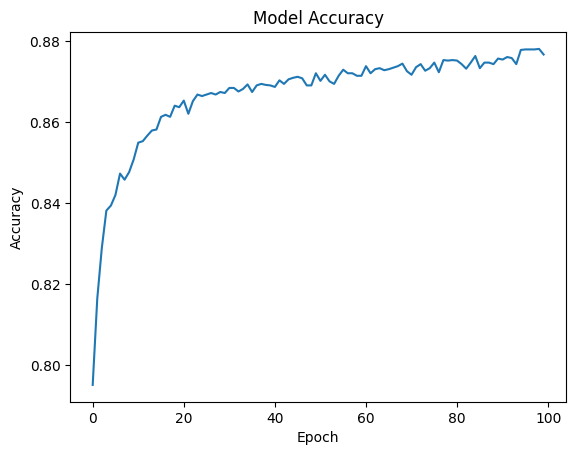

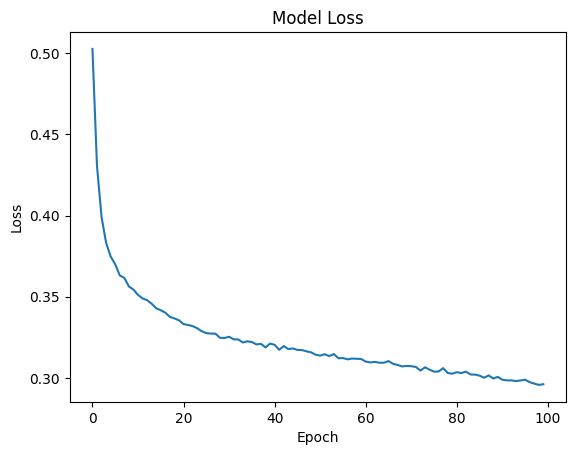

In [12]:
# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
